In [15]:
from finlab.data import Data
import datetime
data = Data()
data.date = datetime.date(2017,1,5)
#找出2017,1,5之前的資料
#預設為data.date = datetime.datetime.now().date()


rev = data.get('當月營收',12)
股本 = data.get('普通股股本', 2)
#get完之後才會形成dataframe

# def 股價淨值比(n):
#     股東權益 = data.get('歸屬於母公司業主之權益合計',1)
#     股本 = data.get('普通股股本', n)
#     price = data.get('收盤價', 100*n)
#     return price.reindex(股本.index, method='ffill')/(股東權益 / 股本)/10
        #只要跟股本那天的股價就好
def 股價淨值比(n):
    股東權益 = data.get('歸屬於母公司業主之權益合計',1)
    股本 = data.get('普通股股本', n)
    price = data.get('收盤價', 100*n)
    #100*n是為了確保可以搜集到（股本.index的資料），如果設定為n，股價出來的日期為2017-01-05
    return price.reindex(股本.index, method='ffill')/(股東權益 / 股本)/10
    #ffill是下面的資料若是NaN，則由上面一行資料填補


pb = 股價淨值比(1)   
pb



stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2016-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.731198,1.436075,0.600574,NaN,NaN,NaN,0.767916,0.777005,NaN,NaN


<font color=steel size=5 face=雅黑>回測：</font>



/var/folders/nl/wtpbztss01s7qh4c59cl2ppw0000gn/T/ipykernel_80471/1965468078.py:24: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  price_已篩選 = price[condition1& condition2 ]


<AxesSubplot:xlabel='date'>

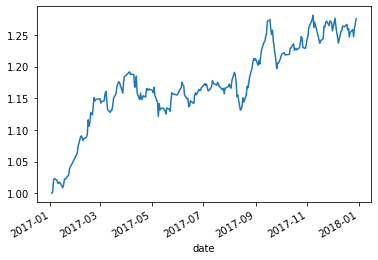

In [16]:
data.date = datetime.date(2018,1,5)
price = data.get('收盤價',1000)
#一年有大約250幾天交易日

def select_range(df):
    cond1=df.index.get_level_values('date') <= '2018'
    cond2=df.index.get_level_values('date') >= '2017'
    df=df[cond1 & cond2]
    return df
#用此篩選年份

price = select_range(price)

#condition = pb[pb.columns[pb.iloc[0]<0.5]]
#df.columns用在true,false選擇上，但是如果已經有一個index列值，則使用df[condition]
#pb.columns[pb.iloc[0]<0.5]會回傳一個一個index
#再將index傳給pb成為新的dataframes

condition1 = pb.columns[pb.iloc[0]<0.5]
#condition為一個index，以此找出pb值小於5

condition2 = rev.columns[rev.iloc[-3:].mean() > rev.iloc[-12:].mean()]

price_已篩選 = price[condition1& condition2 ]
#將index回傳給原本的price做篩選




(price_已篩選 / price_已篩選.iloc[0]).mean(axis = 1).plot()
#此方法才是等同每個股票投一樣多的錢
#(price_已篩選 / price_已篩選.iloc[0]) 因為是dataframes / dataframes ，所以會出現新的dataframes 
#注：dataframes可以和數字、series、dataframes做運算（以座標為運算，沒有的值輸入NaN）

<font color=steel size=5 face=雅黑>以上回測可知收益約為25%</font>